In [1]:
#Python packages
import numpy as np
import pandas as pd
import re
from scipy import stats


#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv', index_col=False)
spec = pd.read_csv('specs.csv', index_col=False)
train_labels = pd.read_csv('train_labels.csv', index_col=False)

### Brief exploration of train shape and feature descriptions

In [6]:
print(train.shape)
print(spec.shape)
print(train_labels.shape)

(11341042, 11)
(386, 3)
(17690, 7)


In [4]:
'''Variable Description'''
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary

In [5]:
description(train)

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,event_id,object,0,384,27253bdc,27253bdc,77261ab5
1,game_session,object,0,303319,45bb1e1b6b50c07b,17eeb7f223665f53,0848ef14a8dc6892
2,timestamp,object,0,10777308,2019-09-06T17:53:46.937Z,2019-09-06T17:54:17.519Z,2019-09-06T17:54:56.302Z
3,event_data,object,0,10893749,"{""event_code"": 2000, ""event_count"": 1}","{""event_code"": 2000, ""event_count"": 1}","{""version"":""1.0"",""event_count"":1,""game_time"":0..."
4,installation_id,object,0,17000,0001e90f,0001e90f,0001e90f
5,event_count,int64,0,3368,1,1,1
6,event_code,int64,0,42,2000,2000,2000
7,game_time,int64,0,834048,0,0,0
8,title,object,0,44,Welcome to Lost Lagoon!,Magma Peak - Level 1,Sandcastle Builder (Activity)
9,type,object,0,4,Clip,Clip,Activity


In [10]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

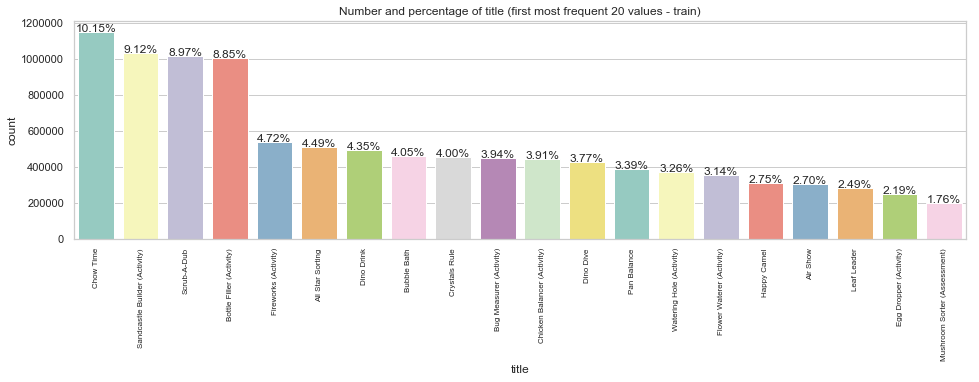

In [52]:
plot_count('title', 'title (first most frequent 20 values - train)', train, size=4)

### Unpacking and exploring the json-formatted 'event data'

In [5]:
import json

In [6]:
train_sample = train.sample(1000)

In [11]:
extracted_event_data = pd.io.json.json_normalize(train_sample.event_data.apply(json.loads))
extracted_event_data.head()

,animal,animals,bird_height,bottle.amount,bottle.color,bottles,bowl_id,bowls,bucket,buckets,buckets_placed,bug,bug_length,buglength,castles_placed,caterpillar,caterpillars,cauldron,cloud,cloud_size,containers,coordinates.stage_height,coordinates.stage_width,coordinates.x,coordinates.y,correct,crystal_id,crystals,current_containers,description,destination,dinosaur,dinosaur_count,dinosaur_weight,dinosaurs,dinosaurs_placed,distance,duration,event_code,event_count,filled,flower,flowers,game_time,gate.column,gate.row,gate.side,group,growth,has_toy,...,location,media_type,misses,mode,movie_id,nest,object,object_type,options,pillars,position,previous_jars,prompt,resources,right,rocket,round,round_number,round_prompt,round_target.animal,round_target.size,round_target.type,sand,scale_contents,scale_weight,scale_weights,session_duration,shell_size,shells,side,size,source,starting_weights,stumps,table_weights,tape_length,target_bucket,target_containers,target_distances,target_size,target_weight,time_played,total_bowls,total_containers,total_duration,toy,version,water_level,weight,weights
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4030,13,NaN,NaN,NaN,43262.0,NaN,NaN,NaN,NaN,NaN,NaN,...,TABLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10884.0,2030,365,NaN,NaN,NaN,269762.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,NaN,NaN,NaN,2.0,yellow,"[{'color': 'blue', 'amount': 2}, {'color': 'bl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,762.0,1015.0,847.0,517.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,683.0,4035,105,NaN,NaN,NaN,143989.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44674.0,2030,738,NaN,NaN,NaN,1589190.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def existing_data(data):
    total = data.isnull().count() - data.isnull().sum()
    percent = 100 - (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    tt = pd.DataFrame(tt.reset_index())
    return(tt.sort_values(['Total'], ascending=False))

stat_event_data = existing_data(extracted_event_data)

In [15]:
stat_event_data.head()

,index,Total,Percent
38,event_code,1000,100.0
39,event_count,1000,100.0
43,game_time,985,98.5
89,round,623,62.3
24,coordinates.y,511,51.1


Text(0, 0.5, 'Features')

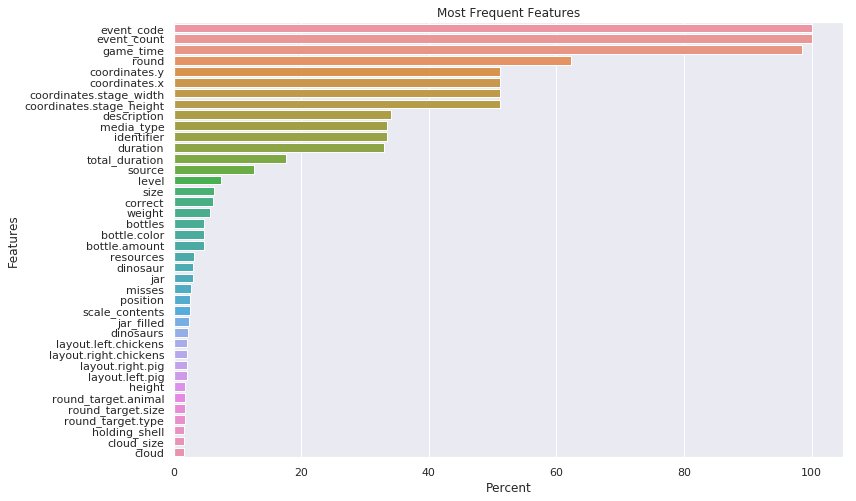

In [16]:
plt.figure(figsize=(12,8))
sns.set(font='Helvetica', palette=("ch:2.5,-.2,dark=.3"))
ax = sns.barplot(x='Percent', y='index', data=stat_event_data.head(40))
plt.title('Most Frequent Features')
plt.ylabel('Features')

### Unpacking the json data within the 'specs' file

In [18]:
spec.args[0]

'[{"name":"game_time","type":"int","info":"millisecond count since start of game"},{"name":"round","type":"int","info":"number of the current round when the event takes place or 0 if no round"},{"name":"level","type":"int","info":"number of the current level when the event takes place or 0 if no level"},{"name":"description","type":"string","info":"the text or description of the instruction"},{"name":"identifier","type":"string","info":"a unique identifier for this piece of instruction"},{"name":"media_type","type":"string","info":"the type of media that has just played:\\n\'audio\' || \'animation\' || \'other\'"},{"name":"duration","type":"int","info":"the duration of the media playback in milliseconds"},{"name":"event_count","type":"int","info":"session event counter"},{"name":"event_code","type":"int","info":"event class identifier"}]'

In [6]:
specs_extracted = pd.DataFrame()
for i in range(spec.shape[0]):
    for arg_item in json.loads(spec.args[i]):
        new_df = pd.DataFrame({'event_id': spec['event_id'][i],\
                           'info':spec['info'][i],\
                           'args_name': arg_item['name'],\
                           'args_type': arg_item['type'],\
                           'args_info': arg_item['info']}, index=[i])
        specs_extracted = specs_extracted.append(new_df)

In [27]:
specs_extracted.head(10)

,event_id,info,args_name,args_type,args_info
0,2b9272f4,The end of system-initiated feedback (Correct)...,game_time,int,millisecond count since start of game
0,2b9272f4,The end of system-initiated feedback (Correct)...,round,int,number of the current round when the event tak...
0,2b9272f4,The end of system-initiated feedback (Correct)...,level,int,number of the current level when the event tak...
0,2b9272f4,The end of system-initiated feedback (Correct)...,description,string,the text or description of the instruction
0,2b9272f4,The end of system-initiated feedback (Correct)...,identifier,string,a unique identifier for this piece of instruction
0,2b9272f4,The end of system-initiated feedback (Correct)...,media_type,string,the type of media that has just played:\n'audi...
0,2b9272f4,The end of system-initiated feedback (Correct)...,duration,int,the duration of the media playback in millisec...
0,2b9272f4,The end of system-initiated feedback (Correct)...,event_count,int,session event counter
0,2b9272f4,The end of system-initiated feedback (Correct)...,event_code,int,event class identifier
1,df4fe8b6,The end of system-initiated feedback (Incorrec...,game_time,int,millisecond count since start of game


In [35]:
specs_extracted['info'].value_counts()

The system-initiated instruction event occurs when the game delivers instructions to the player. It contains information that describes the content of the instruction. This event differs from events 3020 and 3021 as it captures instructions that are not given in response to player action. These events are used to determine the effectiveness of the instructions. We can answer questions like, "did players who received instruction X do better than those who did not?"                                                   109
The end of system-initiated instruction event occurs when the game finishes delivering instructions to the player. It contains information that describes the content of the instruction including duration. These events are used to determine the effectiveness of the instructions and the amount of time they consume. We can answer questions like, "how much time elapsed while the game was presenting instruction?"                                                                  

In [44]:
# specs_extracted.to_csv('specs_extracted.csv', index=False)

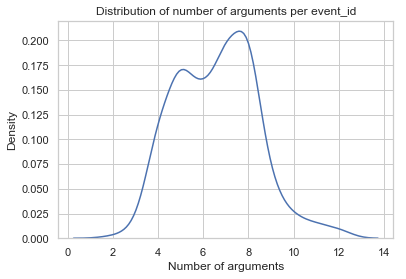

In [29]:
tmp = specs_extracted.groupby(['event_id'])['info'].count()
df = pd.DataFrame({'event_id':tmp.index, 'count': tmp.values})
plt.figure(figsize=(6,4))
sns.set(style='whitegrid')
ax = sns.distplot(df['count'],kde=True,hist=False, bins=40)
plt.title('Distribution of number of arguments per event_id')
plt.xlabel('Number of arguments'); plt.ylabel('Density'); plt.show()

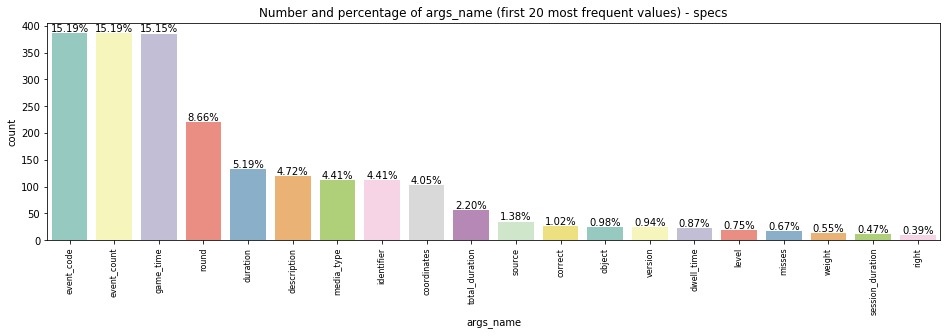

In [11]:
plot_count('args_name', 'args_name (first 20 most frequent values) - specs', specs_extracted, size=4)

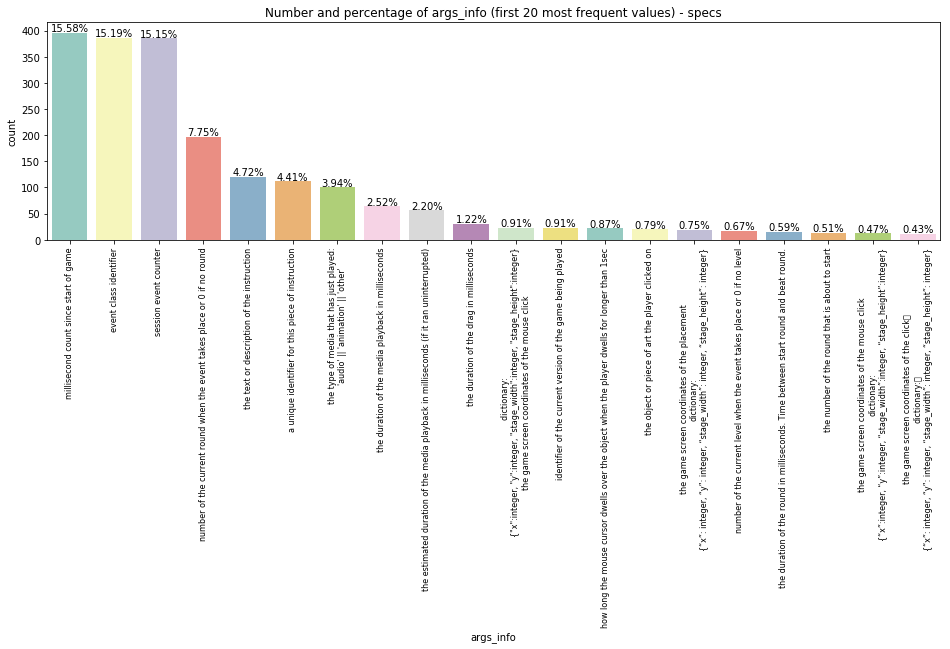

In [13]:
plot_count('args_info', 'args_info (first 20 most frequent values) - specs', specs_extracted, size=4)

### merging both test and train to apply brief feature engineering

In [15]:
test = pd.read_csv('test.csv')

In [18]:
train_points = train.shape[0]
train_points

11341042

In [20]:
train = pd.concat([train,test], axis=0)
train.shape

(12497456, 11)

In [ ]:
'''using the timestamp feature to create multiple date time features to 
hopefully decipher if time of year, time of day, etc. has any impact on 
child performance on the games the play'''

In [21]:
def extract_time_features(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.date
    df['month'] = df['timestamp'].dt.month
    df['hour'] = df['timestamp'].dt.hour
    df['year'] = df['timestamp'].dt.year
    df['dayofweek'] = df['timestamp'].dt.dayofweek
    df['weekofyear'] = df['timestamp'].dt.weekofyear
    df['dayofyear'] = df['timestamp'].dt.dayofyear
    df['quarter'] = df['timestamp'].dt.quarter
    df['is_month_start'] = df['timestamp'].dt.is_month_start
    return df

In [44]:
train['phase_of_day']=np.where(train['timestamp'].dt.hour.isin(range(6,12)),'Morning',np.where(train['timestamp'].dt.hour.isin(range(13,19)),'Evening','Night'))

In [22]:
train = extract_time_features(train)
train.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,month,hour,year,dayofweek,weekofyear,dayofyear,quarter,is_month_start
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,2019-09-06,9,17,2019,4,36,249,3,False
1,27253bdc,17eeb7f223665f53,2019-09-06 17:54:17.519000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False
2,77261ab5,0848ef14a8dc6892,2019-09-06 17:54:56.302000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False
3,b2dba42b,0848ef14a8dc6892,2019-09-06 17:54:56.387000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06 17:55:03.253000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False


In [38]:
'''assuming game time depicts how long each user needs to complete a game, let's 
create a feature to see if time of day has any affect on performance'''

time_per_type = train.groupby(['Phase_Of_Day', 'type'])['game_time'].agg(np.mean)
time_per_type = pd.DataFrame(time_per_type)
time_per_type = time_per_type.reset_index()
time_per_type['time_per_type'] = time_per_type['game_time']
time_per_type.drop('game_time', axis=1, inplace=True)
time_per_type

,Phase_Of_Day,type,time_per_type
0,Evening,Activity,203527.649963
1,Evening,Assessment,60455.164169
2,Evening,Clip,0.000000
3,Evening,Game,254881.440108
4,Morning,Activity,197783.453363
5,Morning,Assessment,52859.283190
6,Morning,Clip,0.000000
7,Morning,Game,345278.351278
8,Night,Activity,184662.517658
9,Night,Assessment,58147.693461


In [40]:
temp = train.copy()

In [41]:
cols = ['Phase_Of_Day', 'type']
temp = temp.join(time_per_type.set_index(cols), on=cols, lsuffix='temp_', rsuffix='group_')
temp.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,month,hour,year,dayofweek,weekofyear,dayofyear,quarter,is_month_start,Phase_Of_Day,time_per_type
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,2019-09-06,9,17,2019,4,36,249,3,False,Evening,0.000000
1,27253bdc,17eeb7f223665f53,2019-09-06 17:54:17.519000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False,Evening,0.000000
2,77261ab5,0848ef14a8dc6892,2019-09-06 17:54:56.302000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False,Evening,203527.649963
3,b2dba42b,0848ef14a8dc6892,2019-09-06 17:54:56.387000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False,Evening,203527.649963
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06 17:55:03.253000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False,Evening,203527.649963


In [42]:
train['time_by_phase_type'] = temp['time_per_type']

In [66]:
'''as described in the discussion page https://www.kaggle.com/c/data-science-bowl-2019/discussion/115034, game type
asks users to perform different tasks (ie. 'Game' have goal-oriented features while 'Activity' doesn't). 
Let's create a feature that measure game time, while weighting 'Game' and 'Assessment' more heavily since they
require more from their users'''

practice = train.groupby(['installation_id','type'])['game_time'].agg(np.mean)
practice = pd.DataFrame(practice).reset_index()
practice = practice.pivot(index='installation_id', columns='type')['game_time']

type,Activity,Assessment,Clip,Game
installation_id,,,,
0001e90f,63367.074627,NaN,0.0,2.764517e+05
000447c4,57105.851852,NaN,0.0,9.338235e+04
0006a69f,104714.852626,24886.245211,0.0,7.020959e+04
0006c192,104420.986733,78984.860058,0.0,7.468495e+04
0009a5a9,44637.201794,NaN,0.0,8.338727e+05
0011edc8,NaN,NaN,0.0,5.126412e+04
00129856,103669.595420,18674.790698,0.0,NaN
0016b7cc,114169.156250,NaN,0.0,7.042880e+04
00195df7,95195.356557,NaN,0.0,NaN


In [79]:
practice = practice.fillna(0)
practice['practice']= practice['Activity']+(practice['Game']*1.5)+(practice['Assessment']*2)

type,level_0,index,installation_id,Activity,Assessment,Clip,Game,practice
0,0,0,0001e90f,63367.074627,0.000000,0.0,276451.739524,4.780447e+05
1,1,1,000447c4,57105.851852,0.000000,0.0,93382.346774,1.971794e+05
2,2,2,0006a69f,104714.852626,24886.245211,0.0,70209.587182,2.598017e+05
3,3,3,0006c192,104420.986733,78984.860058,0.0,74684.945568,3.744181e+05
4,4,4,0009a5a9,44637.201794,0.000000,0.0,833872.670270,1.295446e+06


In [80]:
cols = ['installation_id', 'practice']
practice = practice[cols]
practice.head()

type,installation_id,practice
0,0001e90f,4.780447e+05
1,000447c4,1.971794e+05
2,0006a69f,2.598017e+05
3,0006c192,3.744181e+05
4,0009a5a9,1.295446e+06


In [81]:
'''for interpretability purposes, we will scaled the practice time to seconds as opposed to millseconds'''

practice['practice'] = practice['practice']*.001

In [83]:
temp = temp.join(practice.set_index('installation_id'), on='installation_id', lsuffix='temp_', rsuffix='group_')
temp.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,month,hour,year,dayofweek,weekofyear,dayofyear,quarter,is_month_start,Phase_Of_Day,time_per_type,practice
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,2019-09-06,9,17,2019,4,36,249,3,False,Evening,0.000000,478.044684
1,27253bdc,17eeb7f223665f53,2019-09-06 17:54:17.519000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False,Evening,0.000000,478.044684
2,77261ab5,0848ef14a8dc6892,2019-09-06 17:54:56.302000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False,Evening,203527.649963,478.044684
3,b2dba42b,0848ef14a8dc6892,2019-09-06 17:54:56.387000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False,Evening,203527.649963,478.044684
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06 17:55:03.253000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False,Evening,203527.649963,478.044684


In [84]:
train['practice_sec'] = temp['practice']*100

In [86]:
train.to_csv('train.csv')